In [1]:
#https://strengejacke.github.io/ggeffects/reference/ggpredict.html

In [200]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats.stats import pearsonr
from IPython.display import display, Markdown, Latex
plt.style.use('ggplot')
from datetime import date
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm
from seaborn_qqplot import pplot
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas

import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_40923/3986780640.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [201]:
heatwave_control[heatwave_control['temperature_2m_heat'] == heatwave_control['temperature_2m_heat'].min()]['temp_diff']

6816    8.755218
Name: temp_diff, dtype: float64

In [202]:
heatwave_control = pd.read_csv(data_path + "mobility_heat/final_multivariate_3_SD_90_v6.csv")

In [236]:
heatwave_control.groupby('state')['temperature_2m_heat'].mean()

state
British Columbia    27.948299
California          36.803935
Oregon              33.800141
Washington          33.573476
Name: temperature_2m_heat, dtype: float64

In [234]:
heatwave_control.drop_duplicates('location').groupby('coast_binary')['temperature_2m_heat'].describe()

,count,mean,std,min,25%,50%,75%,max
coast_binary,,,,,,,,
0,105.0,34.132950,4.070901,21.477940,32.510391,34.239639,35.969324,45.548282
1,45.0,29.051993,3.800278,21.358659,26.312504,28.278814,32.157327,36.810579


In [226]:
heatwave_control.drop_duplicates('heat_ID').groupby('state')['Heat Wave Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,298.0,4.265101,2.205027,2.0,2.0,4.0,6.0,11.0
California,721.0,3.812760,2.168500,2.0,2.0,3.0,5.0,11.0
Oregon,518.0,3.393822,1.841736,2.0,2.0,3.0,4.0,11.0
Washington,496.0,3.822581,1.926103,2.0,2.0,3.0,5.0,12.0


In [206]:
heatwave_control['2021'] = [1 if x == 2021 else 0 for x in heatwave_control['year'] ]

In [207]:
heatwave_control['2022'] = [1 if x == 2022 else 0 for x in heatwave_control['year'] ]

In [224]:
heatwave_control

,Unnamed: 0,temperature_2m_heat,month,date_heat,control_day,Heat Wave Duration,large_city,date_x,location,heat_ID,...,popdens_dec,index,june_hw,date_y,annual_min,first_annual_hw,hw_dur_>=_5,2021,2022,avg_temp
0,0,34.180952,6,2020-06-03,2020-05-20,2.0,nonmajor,2020-06-03,"Alameda County, California",cce4c0c1-d403-4052-96e5-3c532c052052,...,10,0,1,2020-06-03,True,1,0,0,0,33.991555
1,1,33.802157,6,2020-06-04,2020-05-21,2.0,nonmajor,2020-06-04,"Alameda County, California",cce4c0c1-d403-4052-96e5-3c532c052052,...,10,1,1,2020-06-03,False,1,0,0,0,33.991555
2,2,33.723932,7,2020-07-11,2020-07-04,2.0,nonmajor,2020-07-11,"Alameda County, California",34d622e1-6076-4977-b2b3-784b87542394,...,10,2,0,2020-06-03,False,0,0,0,0,33.959794
3,3,34.195656,7,2020-07-12,2020-07-05,2.0,nonmajor,2020-07-12,"Alameda County, California",34d622e1-6076-4977-b2b3-784b87542394,...,10,3,0,2020-06-03,False,0,0,0,0,33.959794
4,4,33.705415,8,2020-08-13,2020-08-06,8.0,nonmajor,2020-08-13,"Alameda County, California",32a9911d-ef36-4284-bc0a-8874c791fa93,...,10,4,0,2020-06-03,False,0,1,0,0,36.215668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7377,7377,26.796207,8,2022-08-30,2022-09-06,5.0,nonmajor,2022-08-30,"Thompson-Nicola, British Columbia",6837017c-4496-4b54-9bc7-1ca65c4f4753,...,6,7377,0,2022-07-26,False,0,1,0,1,27.526590
7378,7378,28.312593,8,2022-08-31,2022-09-07,5.0,nonmajor,2022-08-31,"Thompson-Nicola, British Columbia",6837017c-4496-4b54-9bc7-1ca65c4f4753,...,6,7378,0,2022-07-26,False,0,1,0,1,27.526590
7379,7379,26.252051,9,2022-09-01,2022-09-08,5.0,nonmajor,2022-09-01,"Thompson-Nicola, British Columbia",6837017c-4496-4b54-9bc7-1ca65c4f4753,...,6,7379,0,2022-07-26,False,0,1,0,1,27.526590
7380,7380,28.113422,9,2022-09-02,2022-09-09,5.0,nonmajor,2022-09-02,"Thompson-Nicola, British Columbia",6837017c-4496-4b54-9bc7-1ca65c4f4753,...,6,7380,0,2022-07-26,False,0,1,0,1,27.526590


In [208]:
heatwave_control['weekend'].describe()

count    7382.000000
mean        0.273910
std         0.445993
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: weekend, dtype: float64

In [209]:
heatwave_control.groupby(['state'])['residential_difference'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,1058.0,-0.124764,1.816442,-6.0,-1.0,0.0,1.0,6.0
California,2148.0,-0.128957,1.626412,-6.0,-1.0,0.0,1.0,6.0
Oregon,1164.0,0.087629,1.739991,-6.0,-1.0,0.0,1.0,6.0
Washington,1458.0,-0.007545,1.649217,-6.0,-1.0,0.0,1.0,6.0


In [210]:
heatwave_control[heatwave_control['year'] == 2020].groupby('state')['residential_difference'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,135.0,-0.303704,1.223367,-4.0,-1.0,0.0,0.0,6.0
California,699.0,0.034335,1.339918,-6.0,-1.0,0.0,1.0,6.0
Oregon,246.0,0.418699,1.623644,-2.0,0.0,0.0,1.0,6.0
Washington,286.0,0.034965,1.004639,-2.0,0.0,0.0,0.0,6.0


In [211]:
plot_2_summary = heatwave_control.melt(id_vars=['year', 'state'], value_vars=['workplaces_difference', 'residential_difference', 'transit_difference', 'grocery_pharmacy_difference', 'parks_difference', 'retail_difference'])
plot_2_summary.to_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/results/plots/year_describe_v4.csv')

In [225]:
heatwave_control[['residential_difference', 'workplaces_difference', 'transit_difference', 'grocery_pharmacy_difference', 'retail_difference', 'parks_difference']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
residential_difference,5828.0,-0.054564,1.692646,-6.0,-1.0,0.0,1.0,6.0
workplaces_difference,6995.0,-0.590708,3.999664,-25.0,-2.0,0.0,1.0,22.0
transit_difference,4053.0,-0.679250,8.014779,-31.0,-5.0,-1.0,3.0,30.0
grocery_pharmacy_difference,5385.0,0.764531,6.050055,-23.0,-3.0,0.0,4.0,23.0
retail_difference,6271.0,0.416202,6.552423,-25.0,-3.0,0.0,3.0,25.0
parks_difference,3348.0,-3.985663,26.289017,-99.0,-18.0,-6.0,6.0,99.0


In [213]:
plot_2_summary

,year,state,variable,value
0,2020,California,workplaces_difference,2.0
1,2020,California,workplaces_difference,3.0
2,2020,California,workplaces_difference,15.0
3,2020,California,workplaces_difference,2.0
4,2020,California,workplaces_difference,-1.0
...,...,...,...,...
44287,2022,British Columbia,retail_difference,-5.0
44288,2022,British Columbia,retail_difference,9.0
44289,2022,British Columbia,retail_difference,14.0
44290,2022,British Columbia,retail_difference,7.0


In [215]:
heatwave_control['avg_temp'] = heatwave_control.groupby('heat_ID')['temperature_2m_heat'].transform(lambda x: x.mean())

In [216]:
plot_3_summary = heatwave_control.melt(id_vars=['temperature_2m_heat', 'state'], value_vars=['workplaces_difference', 'residential_difference', 'transit_difference', 'grocery_pharmacy_difference', 'parks_difference', 'retail_difference'])
plot_3_summary.to_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/results/plots/scatterplot_v5.csv')

In [217]:
plot_3_summary[plot_3_summary['state'] == 'British Columbia']['temperature_2m_heat'].max()

40.55612175520076

In [218]:
plot_3_summary.groupby('state')['temperature_2m_heat'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,7488.0,27.948299,3.315669,19.266854,25.863382,27.645754,29.740412,40.556122
California,15936.0,36.803935,4.221887,24.768563,34.043009,36.818277,39.947818,47.154137
Oregon,9954.0,33.800141,3.048350,23.828261,32.406237,33.875316,35.523529,44.416451
Washington,10914.0,33.573476,4.670509,20.540545,30.082642,33.685631,37.085483,46.928690


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

## Load model parameters and mobility_heat

In [12]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

In [13]:
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/params_final1.csv")
df.columns = ['variable', 'estimate']


mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/mobility_heat/multivariate_modelling_v22.csv")


In [14]:
mob_vars['heat_temp'] = mob_vars['heat_temp_centered'] + 38

In [15]:
mob_vars['temperature_2m_winter'] = mob_vars['temperature_2m_winter'] - 3.67

In [16]:
mob_vars['temp_diff']

0       13.428375
1        9.585419
2        3.115372
3        3.685379
4        8.565338
          ...    
6289     8.750839
6290    11.081390
6291    13.134964
6292    13.800476
6293     6.203766
Name: temp_diff, Length: 6294, dtype: float64

#### format variables for every year (as opposed to categorical), format binary variable for duration and coast

In [17]:
mob_vars['2020'] = [1 if x==2020 else 0 for x in mob_vars['year']]
mob_vars['2021'] = [1 if x==2021 else 0 for x in mob_vars['year']]
mob_vars['2022'] = [1 if x==2022 else 0 for x in mob_vars['year']]
mob_vars['hw_dur'] = [1 if x=='>5 days' else 0 for x in mob_vars['heatwave_dur']]
mob_vars['coast_binary'] = mob_vars['coast_binary']* 1

### slice parameters for every dependent variable

In [18]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]
df['parks'] = [1 if 'parks' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]
df['transit'] = [1 if 'transit' in x else 0 for x in df['variable'] ]

In [19]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()
parks = df[df['parks'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()
transit = df[df['transit'] == 1].reset_index()

In [20]:
dic = {}
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'parks', 'retail', 'transit']:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['heat_temp_centered_California'] = subset.iloc[1,2]
    dic[response]['British Columbia_intercept'] = subset.iloc[2,2]
    dic[response]['Oregon_intercept'] = subset.iloc[3,2]
    dic[response]['Washington_intercept'] = subset.iloc[4,2]
    dic[response]['heat_temp_centered_British Columbia'] = subset.iloc[5,2]
    dic[response]['heat_temp_centered_Oregon'] = subset.iloc[6,2]
    dic[response]['heat_temp_centered_Washington'] = subset.iloc[7,2]
    dic[response]['temp_diff'] = subset.iloc[8,2]
    dic[response]['stage_frac'] = subset.iloc[9,2]
    dic[response]['weekend'] = subset.iloc[10,2]
    dic[response]['year2021'] = subset.iloc[11,2]
    dic[response]['year2022'] = subset.iloc[12,2]
    dic[response]['hw_duration'] = subset.iloc[13,2]
    dic[response]['first_annual_hw'] = subset.iloc[14,2]
    dic[response]['coast_binary'] = subset.iloc[15,2]
    dic[response]['temperature_2m_winter_British Columbia'] = subset.iloc[16,2]
    dic[response]['temperature_2m_winter_Oregon'] = subset.iloc[17,2]
    dic[response]['temperature_2m_winter_Washington'] = subset.iloc[18,2]
    dic[response]['popdens_dec'] = subset.iloc[19,2]
    dic[response]['income_dec'] = subset.iloc[20,2]
    dic[response]['over65_dec'] = subset.iloc[21,2]
    dic[response]['nonwhite_dec'] = subset.iloc[22,2]

In [49]:
result_dic =  {}
df = pd.DataFrame()
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'parks', 'retail', 'transit']:
    result_dic[response] = {}

for response in ['workplaces', 'residential', 'grocery_pharmacy', 'parks', 'retail', 'transit']:
    for variable in dic[response].keys():
        result_dic[response][variable] = dic[response][variable]
    


In [59]:
results = pd.DataFrame.from_dict(dic).reset_index()

In [63]:
results = results.melt(id_vars=['index'])

In [68]:
results

,index,variable,value
0,global_intercept,workplaces,1.030542
1,heat_temp_centered_California,workplaces,0.006545
2,British Columbia_intercept,workplaces,-2.840775
3,Oregon_intercept,workplaces,-0.643631
4,Washington_intercept,workplaces,-0.957535
...,...,...,...
133,temperature_2m_winter_Washington,transit,-0.144962
134,popdens_dec,transit,-0.174608
135,income_dec,transit,-0.015993
136,over65_dec,transit,-0.247733


In [70]:
results[results['index'] == 'stage_frac']

,index,variable,value
9,stage_frac,workplaces,-0.002916
32,stage_frac,residential,0.001879
55,stage_frac,grocery_pharmacy,-0.000229
78,stage_frac,parks,-0.055158
101,stage_frac,retail,0.006523
124,stage_frac,transit,0.002617


In [76]:
results

,index,variable,value
0,global_intercept,workplaces,1.030542
1,heat_temp_centered_California,workplaces,0.006545
2,British Columbia_intercept,workplaces,-2.840775
3,Oregon_intercept,workplaces,-0.643631
4,Washington_intercept,workplaces,-0.957535
...,...,...,...
133,temperature_2m_winter_Washington,transit,-0.144962
134,popdens_dec,transit,-0.174608
135,income_dec,transit,-0.015993
136,over65_dec,transit,-0.247733


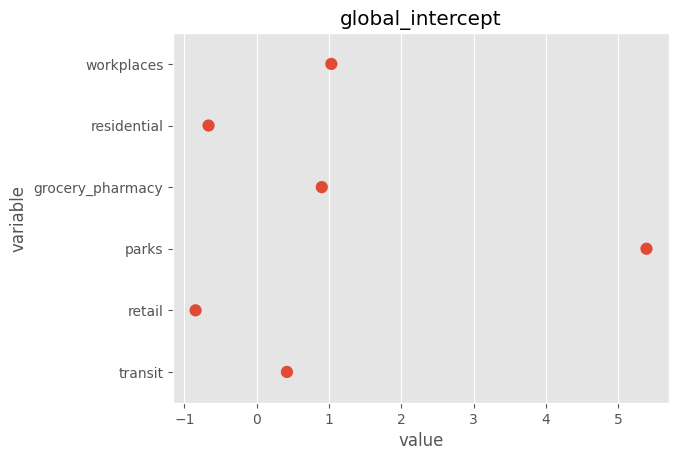

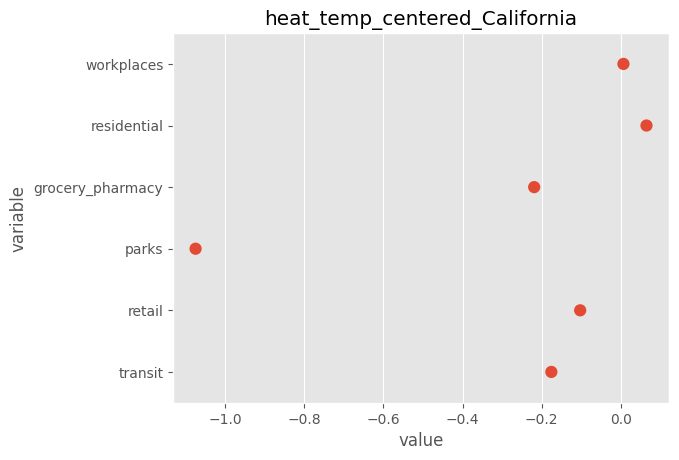

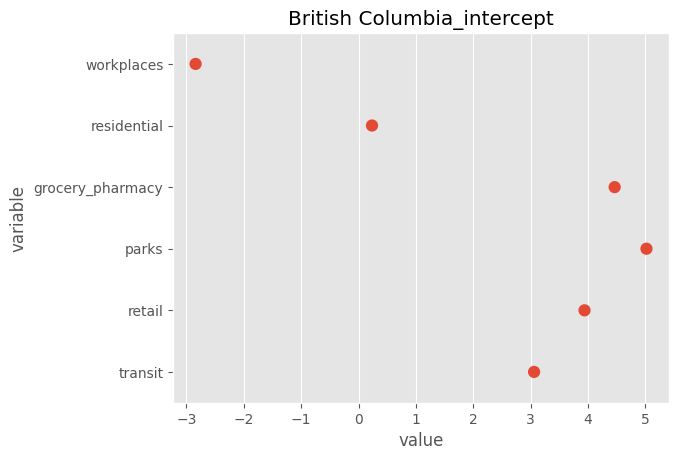

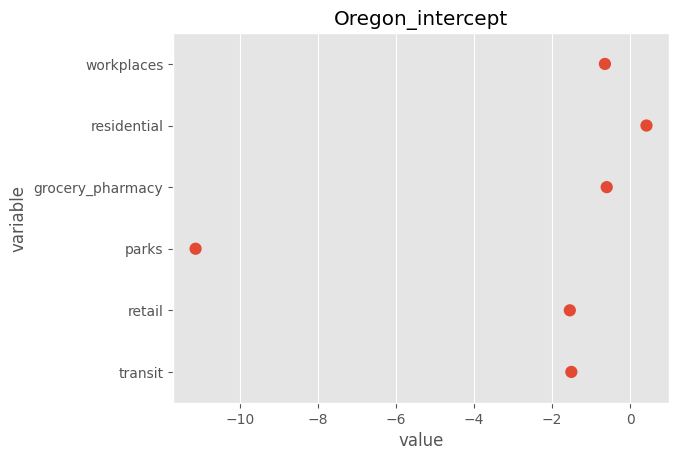

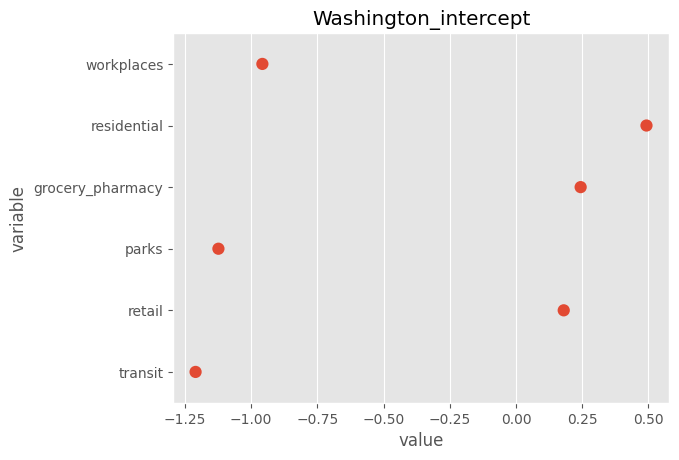

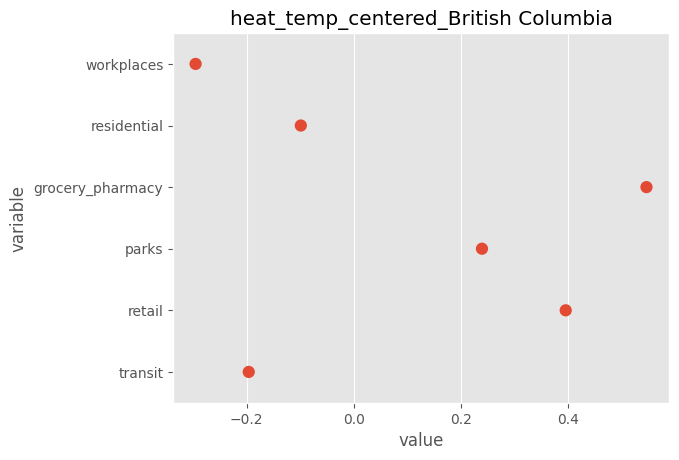

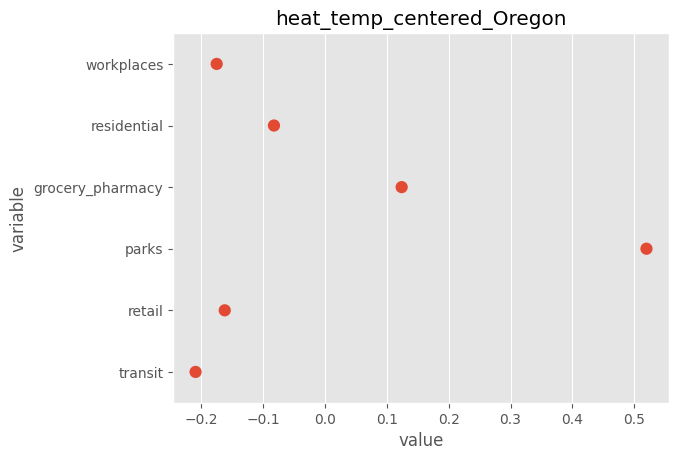

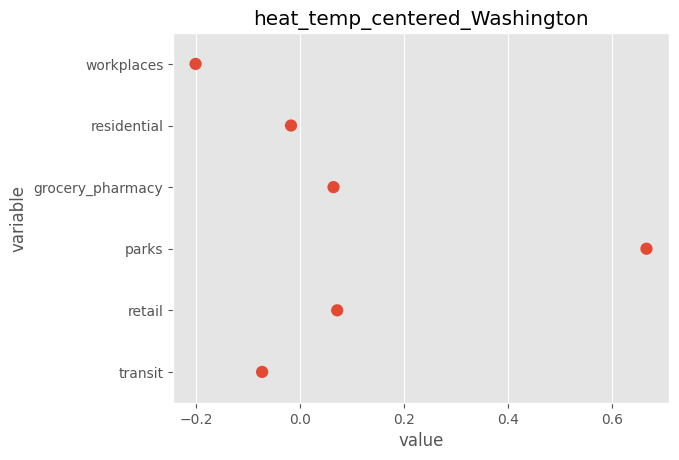

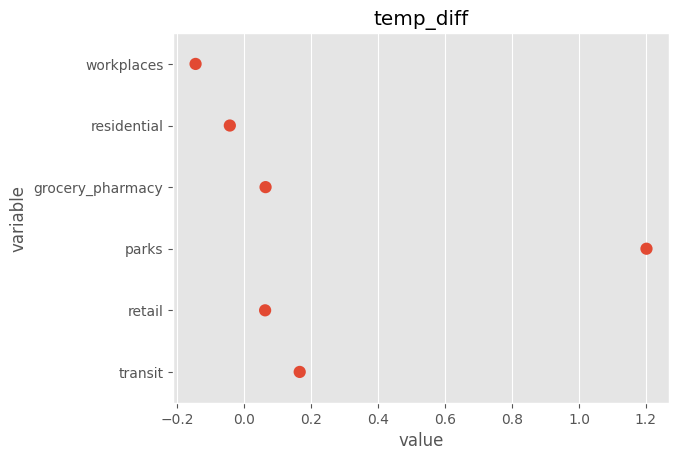

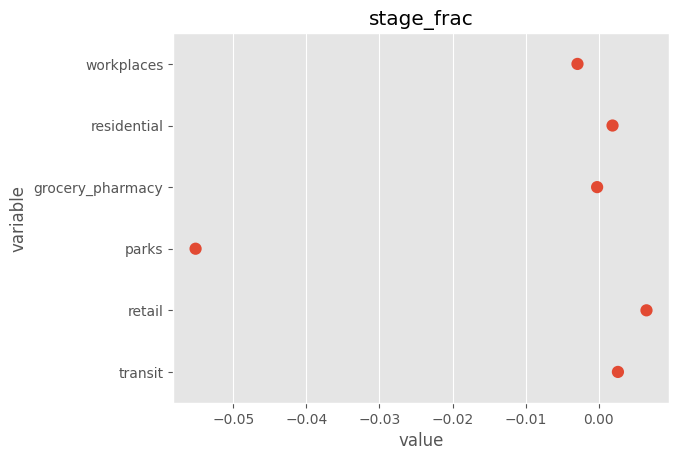

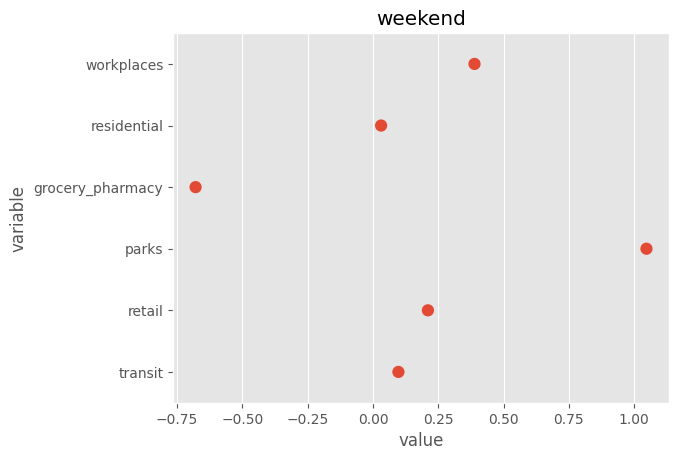

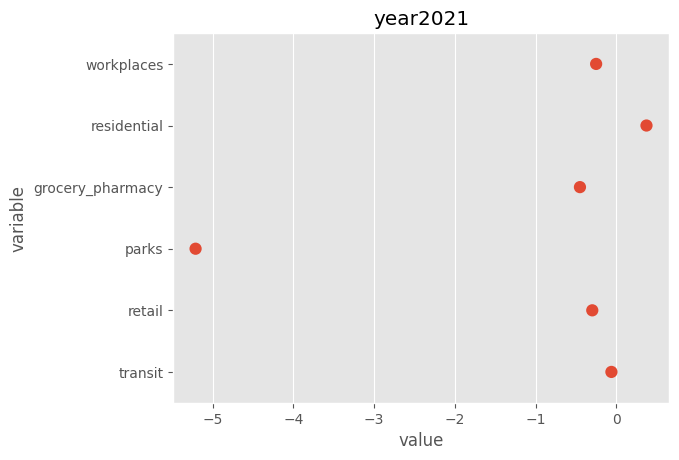

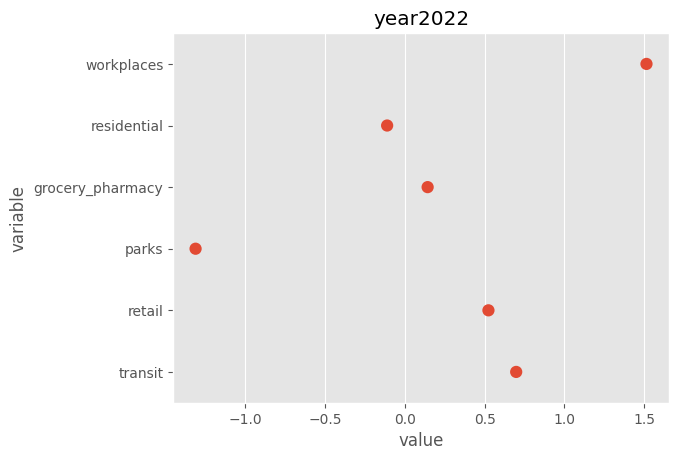

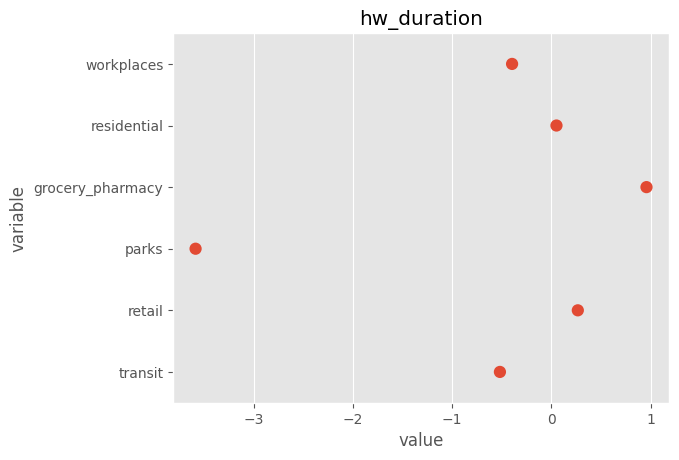

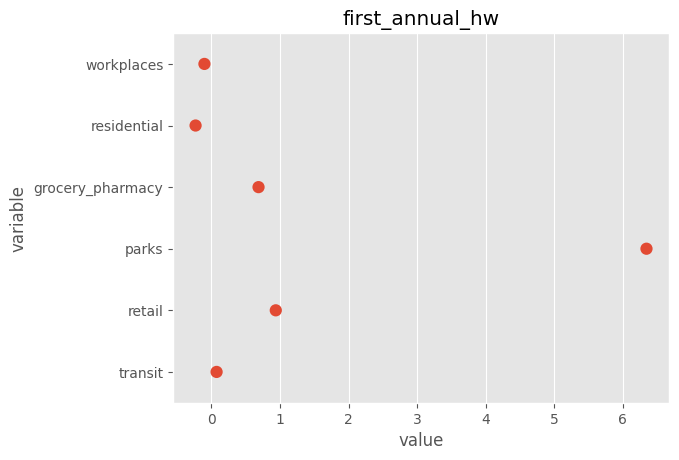

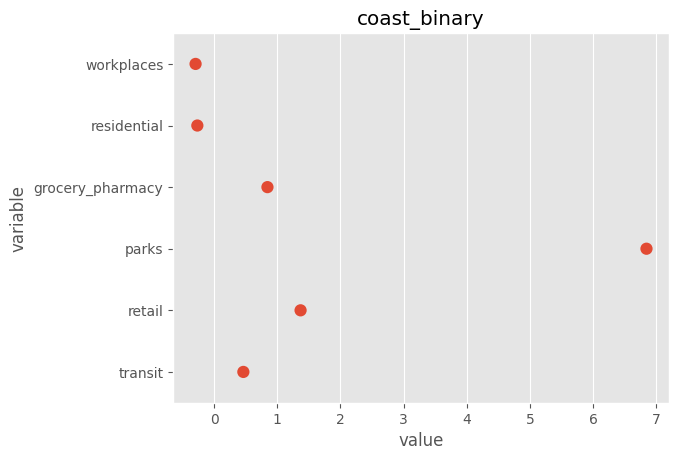

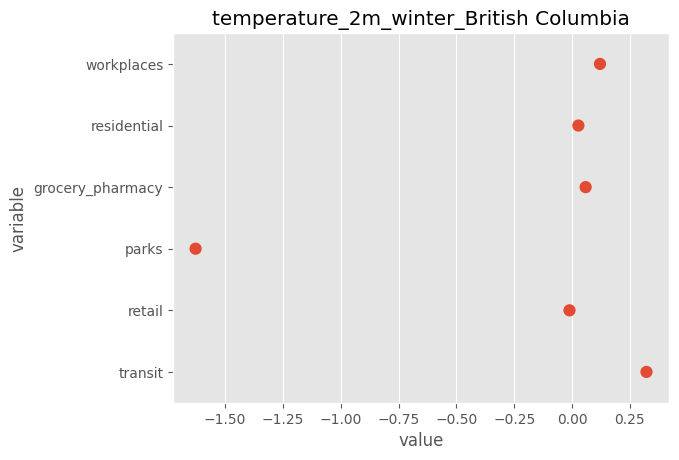

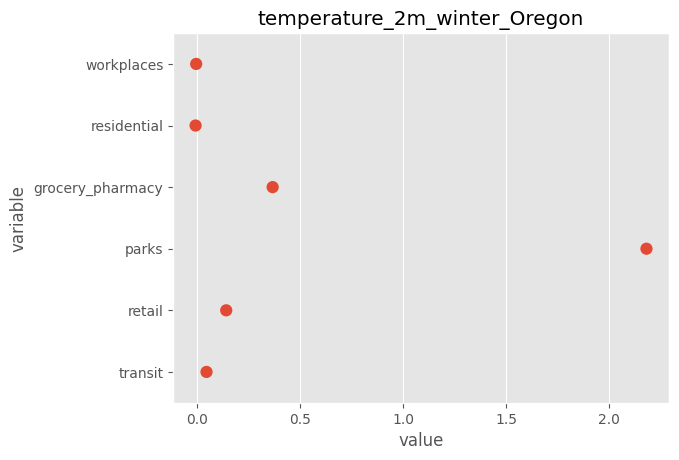

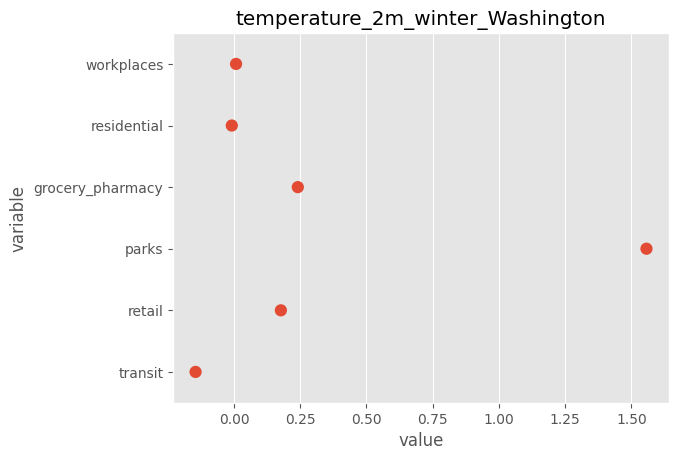

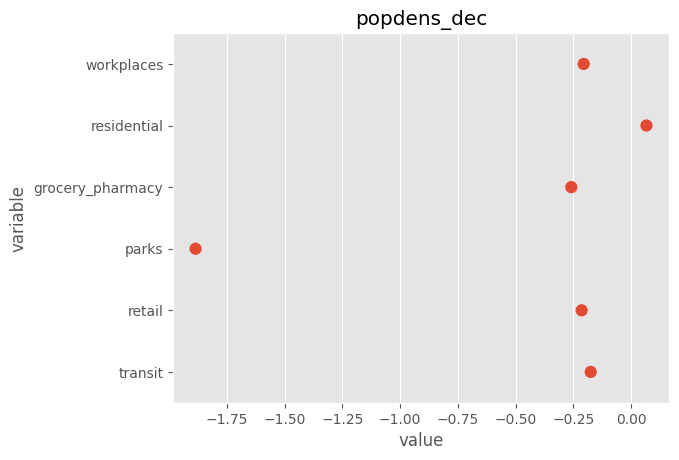

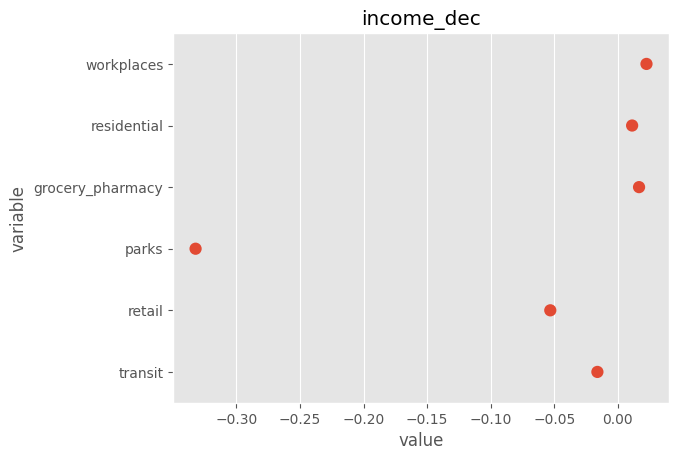

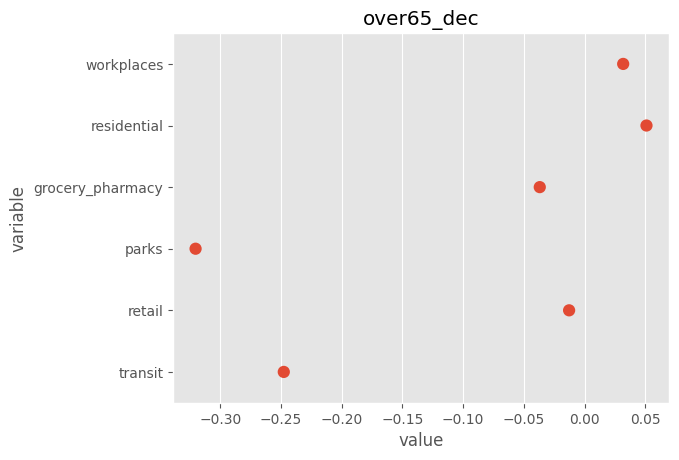

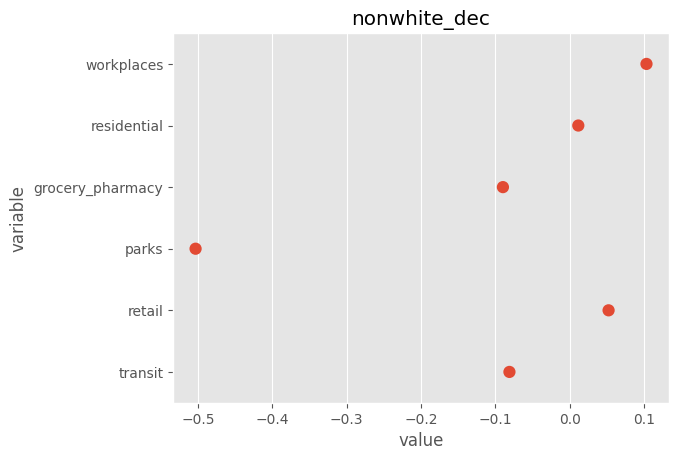

In [84]:
for index in results['index'].unique():
    subset = results[results['index'] == index]
    sns.pointplot(data=subset, x='value', y='variable', linestyles= ' ', a)
    plt.title(index)
    plt.show()

In [32]:
df.melt(value_vars=['variable'], id_vars=['estimate', 'workplaces'])

,estimate,workplaces,variable,value
0,-0.666912,0,variable,FP_Intercept_residential_difference
1,1.030542,1,variable,FP_Intercept_workplaces_difference
2,0.898493,0,variable,FP_Intercept_grocery_pharmacy_difference
3,5.387680,0,variable,FP_Intercept_parks_difference
4,-0.846371,0,variable,FP_Intercept_retail_difference
...,...,...,...,...
133,0.103203,1,variable,FP_nonwhite_dec_workplaces_difference
134,-0.089825,0,variable,FP_nonwhite_dec_grocery_pharmacy_difference
135,-0.503097,0,variable,FP_nonwhite_dec_parks_difference
136,0.052239,0,variable,FP_nonwhite_dec_retail_difference
